## <center> EL2810 Machine Learning Theory </center>
# <center> Laboratory 1 </center>

This laboratory contains two sets of exercises: *Preparatory Exercises* and *Main Tasks*. The Main Tasks will be graded during the Lab session. The Preparatory Exercises will not be graded, but you are strongly encouraged to do them **before the Lab**, since otherwise you might not have enough time to finish the main tasks during the Lab session.  

#### The following libraries need to be imported for the Lab

In [ ]:
""" Do not change anything here """

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

# A. Preparatory Exercises: General Techniques for Simulating Random Variables

In this exercise, we will see two simple methods to generate random variables.

Using the command *numpy.random.rand*, one can generate a random number uniformly distributed in $[0,1]$. Suppose instead that we would like to generate random numbers from a non-uniform distribution. How do we generate these numbers, starting from uniform random variables?

## A.1. Inverse Transformation Method

A general method for simulating a random variable having a distribution —called the *inverse transformation method*— is based on the following idea:

Let $U$ be a uniform $[0,1]$ random variable. For any cumulative distribution function (CDF) $F$ (i.e., $F(x)= \mathbb{P}[X \leq x]$), if we define the random variable $X$ by  

\begin{align}
X = F^{-1}(U),
\end{align}  
where $F^{-1}(u)$ is the smallest number $x$ such that $F(x) \geq u$, then the random variable X has $F$ as CDF.

### Exercise A.1: Simulating an exponential random variable 

In this exercise, we generate 10000 independent samples from an exponential random variable using the inverse transformation method. The CDF of an exponential random variable with parameter $\lambda > 0$ is $F(x) = 1 - e^{-\lambda x}$.  

We shall define a function **exponential_rv** that takes two input arguments, namely: (i) *N_samples* and (ii) *lamb*. *N_samples* defines the number of samples that we need to generate (in this exercise N_samples = 10000) and *lamb* is the parameter $\lambda$ ($> 0$) of the exponential distribution. 

A.1.1. *Complete the function block **exponential_rv**, by replacing the text 'FILL IN'.*

In [38]:
def exponential_rv(N_samples,lamb):
    # N_samples: number of samples to be generated
    # lamb:      parameter of the exponential distribution
    
    # FILL IN
    #('samples' should be a 1D numpy array)
    U = np.random.rand(N_samples)
    samples = -np.log(1-U) / lamb
    return samples

#### Tips
- Avoid *for* loops if possible, making use of numpy vectorizations.
- Check the documentation for *numpy.random.rand*: https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html.

  
  
Having defined the function **exponential_rv**, we now generate 10000 independent samples of exponential random variable with parameter $\lambda = 1$.  

In [39]:
""" Do not change anything here """

N_samples = 10000
lamb = 1
samples = exponential_rv(N_samples,lamb)

#### Empirical CDF 

We need to verify that the samples we have generated come indeed from an exponential distribution. We can do this by computing the *empirical CDF* of the samples, defined for samples $x_1, \dots, x_m$ as  

\begin{align}
\hat{F}(t) = \frac{1}{m} \sum_{i=1}^m \mathbb{1}\{ x_i \leq t \}.
\end{align}  

By the weak law of large numbers, we have that $\hat F(t) \to F(t)$ as $m \to \infty$ in probability. Ideally, we would want the empirical CDF to "look like" the theoretical CDF, which is $1 - \exp(-\lambda t)$.

The function block **empirical_cdf** below computes $\hat{F}$, by taking our generated vector *samples* as input and returning *x* and *ecdf* as outputs. *ecdf* is an 1d array that has the empirical CDF evaluated at the values in the 1d array *x*, which contains the same values as *samples* but sorted in ascending order. 

Go through the function block **empirical_cdf** and try to understand how the empirical cdf is calculated.

In [40]:
""" Do not change anything here """

def empirical_cdf(samples):
    x = np.sort(samples)
    ecdf = np.arange(1, len(x) + 1) / len(x)
    return x,ecdf

In [41]:
x,ecdf = empirical_cdf(samples)

A.1.2. *Write code in the block below to plot, in the same figure, the empirical CDF and theoretical CDF of an exponential random variable. Make use of ***plt.legend()*** function to differentiate between the two plots.*

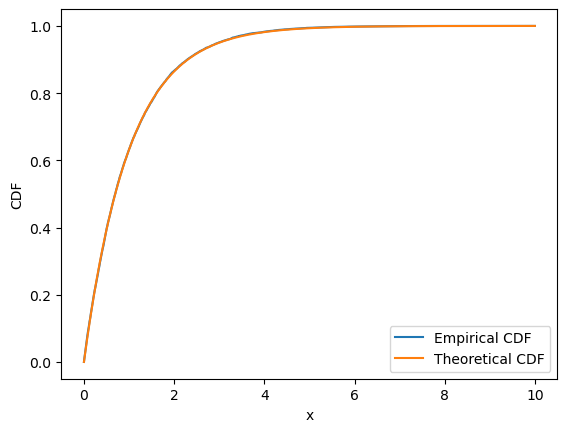

In [42]:
""" Enter your code here. """
def theoretical_cdf(t, lamb):
    return 1 - np.exp(-lamb * t)

tcdf = theoretical_cdf(x, lamb)

plt.plot(x, ecdf, label='Empirical CDF')
plt.plot(x, tcdf, label='Theoretical CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()

plt.show()

## A.2. Rejection Sampling

In general, it is not easy to obtain a closed form expression for $F^{-1}(u)$, where $F$ is the CDF of a random variable $X$. *Rejection sampling* is an alternative method which can be used for generating samples from any random variable that:
1.	assumes values only within a finite range.
2.	has a probability density function (pdf) $f(x)$ that is bounded (i.e., there exists a number $M > 0$ for which $f(x) \leq M$ for all $x$).

We briefly describe the method using a simple example, without getting into the theory. If you are interested in knowing why this method works, please check this link: http://faculty.washington.edu/yenchic/17Sp_403/Lec4_Importance.pdf

Let the maximum value of the pdf $f(x)$ be denoted as $c$ and let $X$ assumes values in $[a, b]$ ($X$ does not need to take all possible values in $[a, b]$). The following figure shows an example of such a pdf:
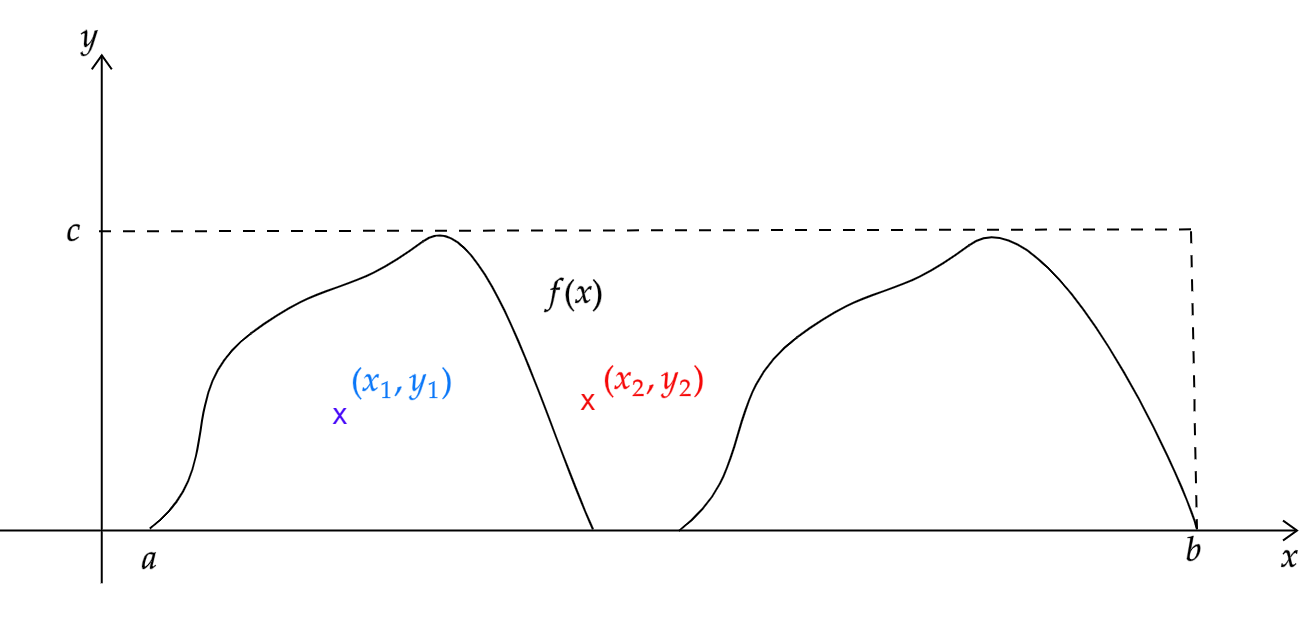

To generate random observations of X through the rejection sampling method, we follow these steps:

Step 1: Enclose the pdf $f(x)$ in the smallest rectangle that fully contains it and whose sides are parallel to the x and y axes.

Step 2: Let $x$ and $y$ be uniform random variables, suitably scaled so that $(x, y)$ is uniformly distributed over the rectangle.
 
Step 3: If this point is "below" the pdf, i.e., $a \leq x \leq b$, $y \leq f(x)$, then accept the $x$-coordinate of the point $x$ as an appropriate sample value of $X$. Otherwise, reject it and return to Step 2. For instance, in the figure above, $(x_1,y_1)$ will be accepted, while $(x_2,y_2)$ will be rejected.

### Exercise A.2: Generate samples uniformly at random from a circular region using rejection sampling

In this exercise, we will use rejection sampling to generate samples that are drawn uniformly at random from a unit circle in $\mathbb{R}^2$, centered around $(0,0)$, as shown in the figure below.   

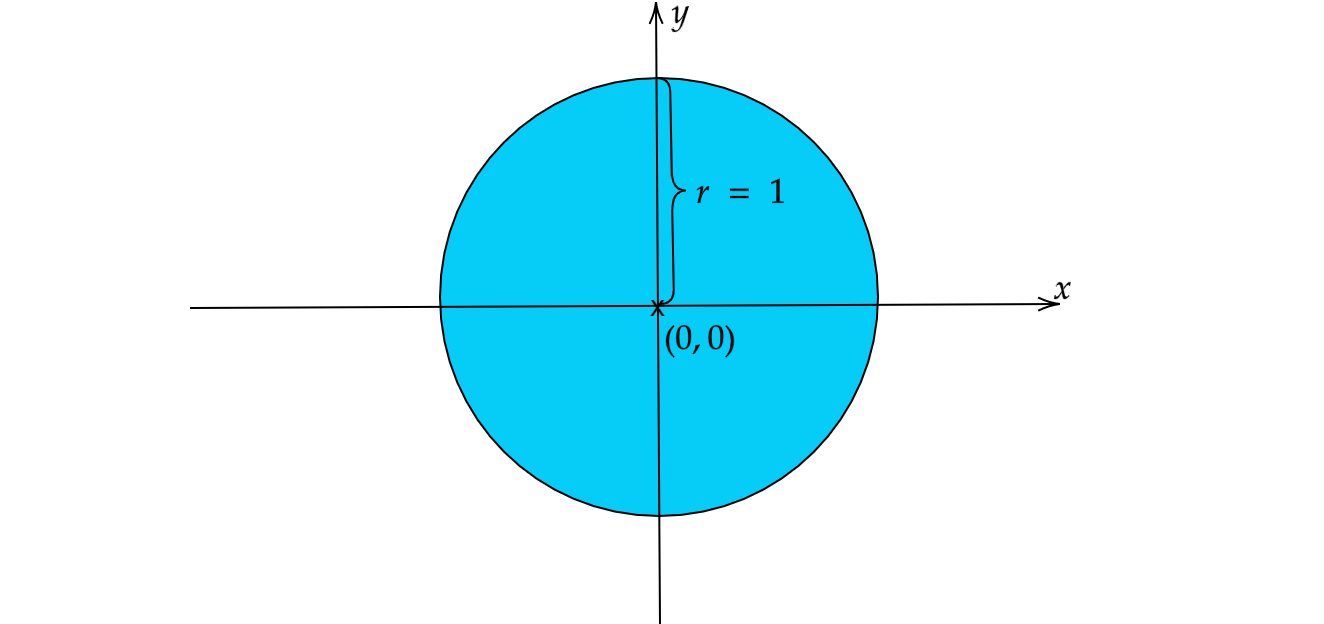

Notice that the samples that we draw should be uniformly distributed in the unit circle of $\mathbb{R}^2$, $C = \{ (x,y) \in \mathbb{R}^2\colon x^2 + y^2 \leq 1 \}$. $(x,y) \in C$ is such that $x$ is a sample of random variable $X$ and $y$ is a sample of random variable $Y$. The joint probability density function of $(X,Y)$ is $f_{XY}(x,y)$, which is a uniform over $C$. That is,  

\begin{align}
f_{XY}(x,y) = \begin{cases}
\displaystyle \frac{1}{\vert C \vert}, & \text{if} \, (x,y) \in C \\
\displaystyle 0, & \text{otherwise},
\end{cases}
\end{align}  

where $\vert C \vert$ denotes the area of the circle, i.e., $\vert C \vert = \pi$. 

We have only described the idea of rejection sampling in the case of one dimension, i.e., when the samples belong to $\mathbb{R}$, but we can easily extend it to the case of the unit circle. Notice that $f_{XY}(x,y)$ is constant in $C$. If we plot $f_{XY}(x,y)$ over $C$ on the $Z$ axis, then we obtain a cylinder of height $1/\pi$. We will enclose the pdf $f_{XY}(x,y)$, which is a cylinder, in the smallest cube that fully contains it. Since $f_{XY}(x,y)$ is constant and is equal to $1/\pi$, the height of the smallest cube that contains it is $1/\pi$. This is equivalent to considering the smallest rectangle that contains $C$, as shown in the next figure.

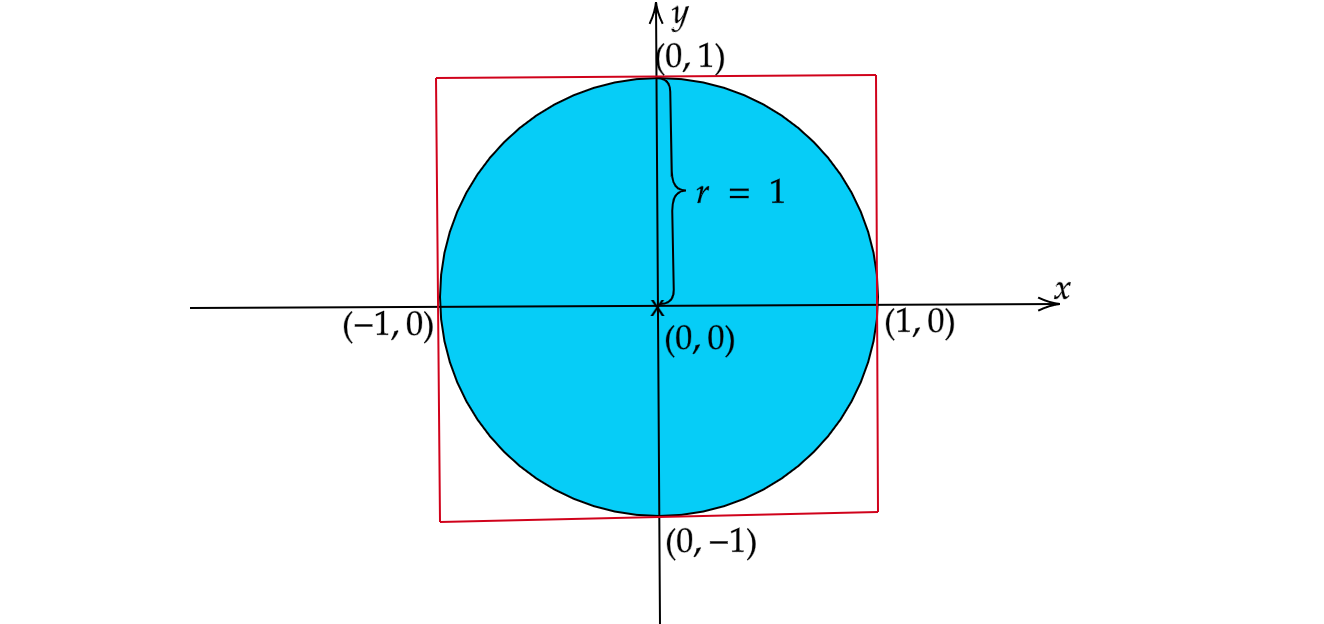



In order to draw samples uniformly from $C$ using rejection sampling, we have to generate two independent uniform random numbers $r_1,r_2$ from $[0,1]$ and rescale them to generate a point $(x,y)$ that is uniformly distributed over the rectangle (using a suitable linear transformation). If this point $(x,y)$ belongs to $C$, then accept $(x,y)$ as an appropriate sample value of $(X,Y)$. Otherwise, reject it and draw another sample $(x,y)$.  

A.2.1. *Complete the function block **circle_data** to generate 10000 samples, uniformly at random, from the above unit circle, replacing the comments 'FILL IN' with suitable code. The function block takes the number of samples that need to be generated, denoted by ***n_samples***, as input.* 

In [43]:
# Function to generate samples uniformly at random from a unit circle 

def circle_data(n_samples):
    # n_samples: number of samples to be generated
    
    samples = np.zeros((n_samples,2))
    
    for i in range(n_samples):
        flag = True
        while flag:
            # FILL IN: Generate a point on the tightest box enclosing the semi-circles
            x = 2 * np.random.rand() - 1
            y = 2 * np.random.rand() - 1
            if x**2 + y**2 <= 1:
                 # FILL IN: Insert point in samples
                samples[i] = [x, y]
                flag = False
    return samples

*Note:* The variable ***flag*** is used is generate random points until the condition needed for their acceptance is fulfilled.

Below is a code that plots the randomly generated samples on the unit circle, to verify that they are indeed uniformly distributed in the circle.

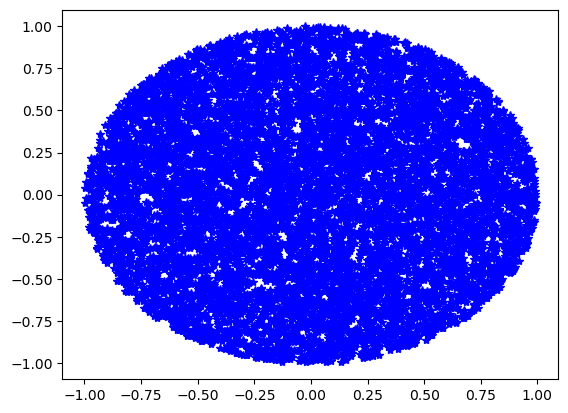

In [44]:
""" Do not change anything here """

n_samples = 10000 # Number of samples that have to be generated uniformly on the unit circle
samples   = circle_data(n_samples)
plt.plot(samples[0:n_samples,0],samples[0:n_samples,1],"*b")

  
# B. Main Tasks

## B.1. Binary Classification of Double Semi-Circles

In this task we will explore two methods for binary classification. Consider the following *double semi-circles* as shown in the figure below:
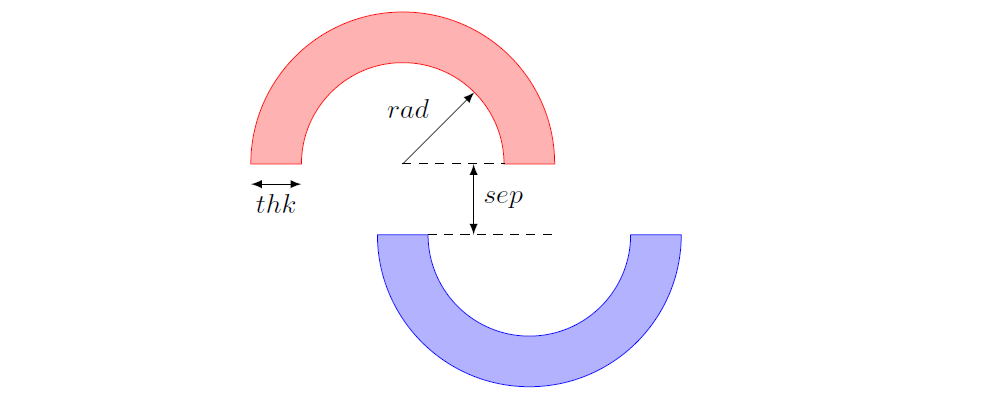

The upper semi-circle, which is coloured in red, belong to class $1$ and the lower semi-circle, which is coloured in blue, belong to class $-1$. Both semi-circles have the same radius and thickness denoted by *rad* and *thk* respectively. The two semi-circles are seperated by a distance denoted by *sep*. Our goal is to generate a synthetic data set that has *N* samples, where each sample is drawn uniformly at random from either class $1$ or class $-1$. 

### Exercise B.1: Generating Synthetic Data for Double Semi Circles

In this exercise, we generate synthetic data for the binary classification task.

B.1.1. *Complete the following function block **double_circle** that takes ***N*** (number of samples to be generated), ***rad*** (radius), ***thk*** (thickness) and ***sep*** (separation) as inputs, and returns ***samples*** as output, which is the synthetic data that has ***N*** samples, where each sample is either in class $1$ or class $-1$. Use the rejection sampling method to generate the synthetic data.*

In [45]:
def double_circle(N, rad, thk, sep):

    """ FILL IN """
    """ 'samples' is a Nx3 array where each row in this array correspond to a sample that either belongs to class -1 or class 1.
        Each row contains the x-coordinate, y-coordinate and class of the sample. """
    
    samples = np.zeros((N,3))
    x_lower_bound = -(3*rad + (5/2)*thk)/2
    
    for i in range(N):
        flag = True
        while flag:
            x = (3*rad+(5/2)*thk) * np.random.rand() + x_lower_bound
            y = (2*rad+2*thk+sep) * np.random.rand() - (2*rad+2*thk+sep)/2
            
            if y>=sep/2 and rad**2<=(x-(x_lower_bound+thk+rad))**2 + (y-0.5*sep)**2 <= (rad+thk)**2:
                samples[i] = [x, y, -1]
                flag = False

            elif y<=-sep/2 and rad**2<=(x-(x_lower_bound+3/2*thk+2*rad))**2 + (y+0.5*sep)**2<=(rad+thk)**2:
                samples[i] = [x, y, 1]
                flag = False

    return samples

#### Tips:

- What is the smallest rectangle that contains both semi circles? 
- Come up with two separate algebraic conditions that check whether a point is inside class $1$ (red semi-circle) or class $-1$ (blue-semi circle).

B.1.2. *Write code in the next block to do the following:*  
(a) *Generate double semi-circle synthetic data containing classes $-1$ and $1$, using the function ***double_circle***. Take ***N=2000, rad=10, thk=5, sep=5***.*  
(b) *Plot the synthetic data that you obtained in (a). The plot should clearly distinguish between classes $-1$ and $1$ visually. Use red color for class $-1$ (upper semi-circle) and blue color for class $1$ (lower semi-circle). Comment on the linear seperability of the data.*

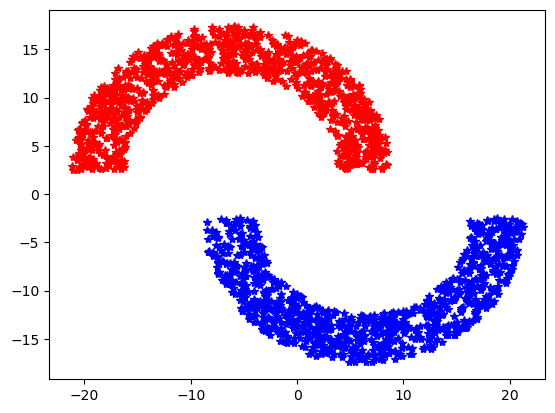

In [46]:
N = 2000
rad = 10
thk = 5
sep = 5
samples = double_circle(N, rad, thk, sep)

for i in range(N):
    if samples[i, 2] == 1:
        plt.plot(samples[i, 0], samples[i, 1], "*b")
    elif samples[i, 2] == -1:
        plt.plot(samples[i, 0], samples[i, 1], "*r")

In [47]:
""" Write your answer here on the linear separability of the synthetic data. """

' Write your answer here on the linear separability of the synthetic data. '

#### Tip:
Separate the generated points according to their class into two numpy arrays, to plot them with different colors.

### Exercise B.2: Classification of double semi-circles

In this exercise we perform binary classification of the synthetic data generated in Exercise B.1, using different methods.

B.2.1. *If the synthetic data obtained in part (a) of Exercise B.1.2 is linearly separable, then implement the Perceptron Learning Algorithm (PLA) by following the next steps:*

a. *Complete the function block ***perceptron(S)*** below, that takes ***S*** (the synthetic data) as input, and outputs the weight vector ***w*** that correctly classifies the samples in the synthetic data.*

In [48]:
def perceptron(S):

    w = np.zeros(S.shape[1])  # Now the weights include the bias term
    # Separate the features and labels
    X, y = S[:, :2], S[:, 2]
    # Add a bias term to the features (x0 = 1)
    X = np.insert(X, 0, 1, axis=1)
    # Initialize a boolean to check if any updates were made in the iteration

    while True:
        # Compute the predictions for all samples
        predictions = np.dot(X, w)
        # Find indices where the prediction is incorrect
        misclassified_indices = np.argwhere(y * predictions <= 0).flatten()

        if misclassified_indices.size > 0:
            # Randomly pick a misclassified index
            i = np.random.choice(misclassified_indices)
            # Update the weight vector w
            w += y[i] * X[i]
        else:
            # If no misclassifications, then no update is done and we can stop the algorithm
            return w
        


#### Tips:
- Use the pseudo-code provided in the lecture slides.

- Consider the function *numpy.argwhere()* (https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html) to find an index $i$ such that $y_i(w^Tx_i) \leq 0$.

- Make use of numpy vectorization, wherever possible, to speed up computations.

b. *Plot the synthetic data and the line that separates the two classes. This is the line that is uniquely identified by the weight vector ***w*** returned by PLA.*

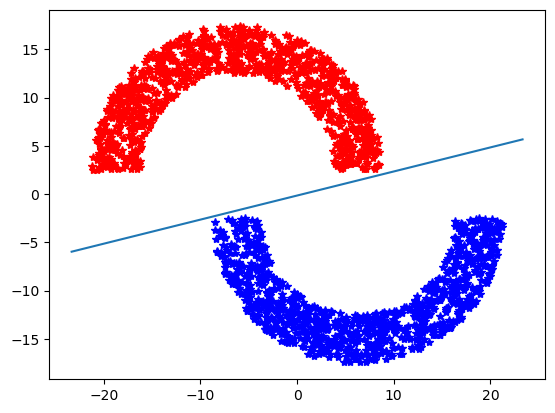

In [49]:
# Plot the samples again
for i in range(N):
    if samples[i, 2] == 1:
        plt.plot(samples[i, 0], samples[i, 1], "*b")
    elif samples[i, 2] == -1:
        plt.plot(samples[i, 0], samples[i, 1], "*r")

weight_vector = perceptron(samples)
# Plot the decision boundary
a, b = plt.xlim()  # Get the current limits of the x-axis
coefficients = weight_vector[1:]  # Exclude the bias term for the equation of the line
plt.plot([a,b], -(weight_vector[0] + coefficients[0]*np.array([a,b])) / coefficients[1])
plt.show()

#### Tip:
You can use the command 'plt.plot([a,b], -(coefficients[0]/coefficients[1])*[a,b])' to draw the hypothesis line between values *a* and *b* of the horizontal axis.

B.2.2. *Suppose now that in part (a) of exercise B.1.2 we set **rad = 10**, **thk = 5**, **sep = -5**. Does PLA work in this case? Justify your answer. Also, plot the double semi-circles synthetic data that you have obtained for this specification.*

In [50]:
""" Write your answers here. """

' Write your answers here. '

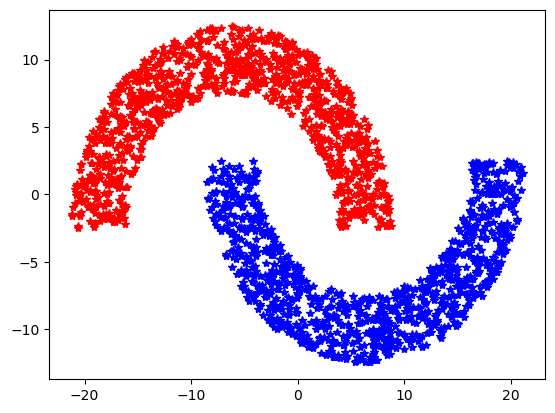

In [51]:
"""  Fill in your code here. """
rad,thk,sep=10, 5,-5
samples = double_circle(N, rad, thk, sep)

for i in range(N):
    if samples[i, 2] == 1:
        plt.plot(samples[i, 0], samples[i, 1], "*b")
    elif samples[i, 2] == -1:
        plt.plot(samples[i, 0], samples[i, 1], "*r")

B.2.3. *If PLA does not work for the specifications in Exercise B.2.2, then implement Logistic Regression. In particular, carry out the following task*:

a. *Fit the synthetic data of Exercise B.2.2 using logistic regression (using the command 'LogisticRegression' of the Python sklearn library (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for details), obtain its weight vector and save in a variable called 'coefficients'.*

In [52]:
""" Fill in your code here. """
from sklearn.linear_model import LogisticRegression
X, y = samples[:, :2], samples[:, 2]
clf = LogisticRegression().fit(X, y)
X_pred = clf.predict(X[:2, :])
coefficients=clf.coef_
coefficients

array([[ 0.0999883 , -0.68035865]])

  
b. *Plot the synthetic data and the hypothesis given by logistic regression.* 

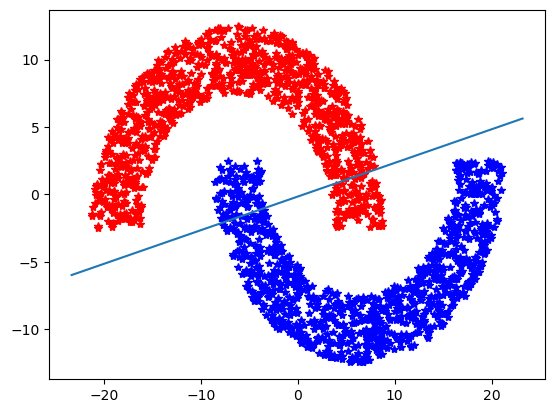

In [53]:
""" Fill in your code. """
for i in range(N):
    if samples[i, 2] == 1:
        plt.plot(samples[i, 0], samples[i, 1], "*b")
    elif samples[i, 2] == -1:
        plt.plot(samples[i, 0], samples[i, 1], "*r")
a, b = plt.xlim()  # Get the current limits of the x-axis
coefficients = weight_vector[1:]  # Exclude the bias term for the equation of the line
plt.plot([a,b], -(weight_vector[0] + coefficients[0]*np.array([a,b])) / coefficients[1])
plt.show()

c. *Compute the empirical 0-1 loss for the hypothesis given by logistic regression.*

In [54]:
""" Fill in your code here. """
accuracy = clf.score(X, y)
empirical_01_loss = 1 - accuracy

print("Empirical 0-1 loss is", empirical_01_loss*100,"%")

Empirical 0-1 loss is 7.899999999999996 %


## B.2. PAC Learning: Axis-Aligned Rectangles

Recall the *Axis-Aligned Rectangles* example of binary classification seen in the lectures. The setup is the following:

One is given examples of red and blue points $x = (a, b)$ in box $ \mathcal{X}= [0,1] \times [0,1]$.
Their coordinates and colors are drawn independently from an unknown distribution. $\mathcal{Y} = \{0,1\}$ where $0$ corresponds to a blue point and $1$ corresponds to a red point. 

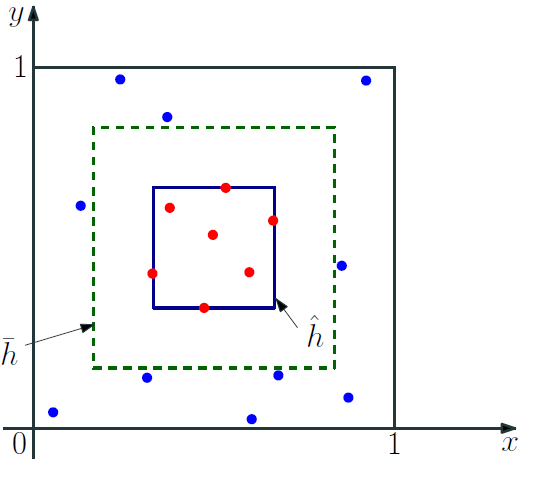

The goal is to predict the color of the next sampled point, given its coordinates $(x,y)$.

To predict the color of a given point $(x,y)$, we assume that a good prediction can be generated by
some axis-aligned rectangle: points inside and/or on the boundary of a given axis-aligned rectangle are classified as red and the points outside the rectangle are classified as blue. The set of axis-aligned rectangles is the hypothesis class $\mathcal{H}$. The green dashed rectangle $\bar{h}$ is the optimal hypothesis (which, by the realizability assumption, yields zero risk) and the blue rectangle is a hypothesis that we build by fitting the tightest rectangle that contains all red points, $\hat{h}$. 

It has been shown in the lectures that $L_{\mathcal{D}}(\hat{h}) \leq \epsilon $ with probability at least $1 - 4 \exp\left(- \displaystyle \frac{m \epsilon}{4}\right)$. 

The purpose of this task is to simulate the axis-aligned rectangles example, and verify the sample complexity of our learning algorithm by building an axis-aligned rectangle based on the training set, computing the PAC bound empirically, and comparing the obtained empirical bound with the theoretical bound (by varying the accuracy parameter $\epsilon$).

### Exercise B.3: Simulation of data for an axis-aligned rectangles example

In this exercise we generate samples for the axis-aligned rectangles example, by first drawing a random optimal hypothesis and then using it to generate random labeled samples.

*B.3.1. Write a code in the block below to draw a target hypothesis at random, by generating its corners using ***np.random.rand****.

$\textbf{Note:}$ In order to specify the corners of the rectangle, we need only the following parameters: the x- and y-coordinates of the bottom left corner, and the x- and y-coordinates of the top right corner.

In [69]:
points = np.random.rand(2, 2)
# Sort the points to get the bottom-left and top-right corners
bottom_left = np.min(points, axis=0)
top_right = np.max(points, axis=0)
location_target =(bottom_left[0],top_right[0],bottom_left[1],top_right[1])

To generate a training set, we need two things:  

- First, we need to draw samples randomly from the domain set $\mathcal{X}= [0,1] \times [0,1]$. This can be achieved by using *np.random.rand(2)*. We will carry out this task in the next exercise. 

- Second, we need to label the randomly generated samples, using the target rectangle generated in Exercise B.3.1. If a particular sample $(x,y) \in \mathcal{X}$ falls inside the target rectangle, then we label it as $1$; otherwise, we label it as $0$. The function block **target_rect**, to be defined below, labels the randomly generated sample. It takes randomly generated point (**x**,**y**) and **location** as inputs, where **location** is a Python 4-tuple corresponding to the parameters that specify the corners of the target rectangle.

B.3.2. *Complete the function block ***target_rect*** below, by replacing the 'FILL IN' comments with code. ***target_rect*** should return the boolean value ***True*** if the sample falls inside the optimal axis parallel rectangle, and ***False*** otherwise.*

In [70]:
def target_rect(x,y,location):
    
    if location[0]<=x<=location[1] and location[2] <= y <= location[3]:
        return True
    else:
        return False

### Exercise B.4: Learning of a good hypothesis for the axis-aligned rectangles example

Once the training set is generated, we need to construct the hypothesis $\hat{h}$, by selecting the samples that are labelled as $1$ and forming the smallest axis-aligned rectangle containing them.

*B.4.1. Fill the function block ***estimated_rect*** that takes samples that are labelled $1$ as a list and outputs the smallest axis parallel rectangle containing them as a tuple ***(xmin,xmax,ymin,ymax)***, where ***xmin*** and ***xmax*** are the minimum and maximum x-coordinates of the rectangle, and similarly for ***ymin*** and ***ymax***.*

In [73]:
def estimated_rect(points):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    
    xmin = np.min(x_coords)
    xmax = np.max(x_coords)
    ymin = np.min(y_coords)
    ymax = np.max(y_coords)
    
    return (xmin, ymin, xmax, ymax)

The next step is to how to estimate the true risk of the learning algorithm.  

We can estimate $L_{\mathcal{D}}(\hat{h})$ by randomly generating a new set of samples, called a *test set*. Then, the average number of samples in the test set for which $\hat{h}$ and $\bar{h}$ disagree is a good estimate of $L_{\mathcal{D}}(\hat{h})$.

Indeed, let the number of samples in the test set be $N_{\text{Test}}$. If $N_{\text{Test}}$ is large, then by weak law of large numbers,  

\begin{align}
\frac{1}{N_{\text{Test}}} \sum_{i=1}^{N_{\text{Test}}} \mathbb{1}\{ \hat{h}(x_i) \neq \bar{h}(x_i) \} \stackrel{p}{\rightarrow}  &\mathbb{E}_{x \sim \mathcal{D}}[\mathbb{1}\{ \hat{h}(x) \neq \bar{h}(x)] \\ 
&= \mathbb{P}_{x \sim \mathcal{D}}[\hat{h}(x) \neq \bar{h}(x)] \\
&= L_{\mathcal{D}}(\hat{h}(S)).
\end{align}  

Now, to calculate $\mathbb{P}\left( L_{\mathcal{D}}(\hat{h}(S)) \leq \epsilon \right)$, we can use Monte-Carlo simulations with respect to the training sample $S$. Note, in particular, that $\mathbb{P}\left( L_{\mathcal{D}}(\hat{h}(S)) \leq \epsilon \right)$ is the CDF of $L_{\mathcal{D}}(\hat{h}(S))$. Thus, we can plot the approximate value of $\mathbb{P}\left( L_{\mathcal{D}}(\hat{h}(S)) \leq \epsilon \right)$ as a function of $\epsilon$ by computing the empirical CDF of $L_{\mathcal{D}}(\hat{h}(S))$!

The following code block implements the ***Monte_Carlo*** function, that returns a list of values for the estimate of $L_{\mathcal{D}}(\hat{h}(S))$ based on ***N_test*** samples.

In [74]:
""" Do not change anything here """

# Monte Carlo simulation of MC axis-aligned rectangles estimates based on N_estim samples, with
# N_test samples for the estimation of the risk, and where the target rectangles has coordinates
# given by location_target
def Monte_Carlo(N_estim, N_test, MC, location_target):
    risks = [0]*MC
    
    for i in range(MC):
        # Generate samples for estimation
        points_position = np.random.rand(N_estim,2)
        points_label    = [target_rect(x,y,location_target) for x,y in zip(points_position[:,0],points_position[:,1])]
        positive_points = [(x,y) for x,y,label in zip(points_position[:,0],points_position[:,1],points_label) \
                           if label==True]

        # Estimate rectangle
        location_estimate = estimated_rect(positive_points)

        # Estimate generalization error
        points_position = np.random.rand(N_test,2)
        errors          = [target_rect(x,y,location_target) != target_rect(x,y,location_estimate) \
                           for x,y in zip(points_position[:,0],points_position[:,1])]
        risks[i]        = sum(errors)/N_test
    return risks

B.4.2. *Complete the following code, which plots an estimate of $\mathbb{P}\left( L_{\mathcal{D}}(\hat{h}(S)) \leq \epsilon \right)$ as a function of $\epsilon$. The variables (numpy arrays) ***x*** and ***ecdf*** should provide the x- and y-coordinates of the empirical CDF of the samples in 'risks' (See the Section on the Empirical CDF, under the Preparatory Exercises). The variable (numpy array) ***th_conf*** corresponds to the theoretical bound provided in the lectures, as a function of ***x***.*

In [ ]:
N_estim = 1000
N_test  = 10000
MC      = 10000
risks = Monte_Carlo(N_estim,N_test,MC,location_target)

# CDF plot
x    = np.sort(risks)
ecdf = np.arange(1, len(x) + 1) / len(x)

th_conf = """ FILL IN """
th_conf[th_conf < 0] = 0

plt.rcParams['figure.figsize'] = [18, 10]
plot1, = plt.plot(x,ecdf,'b')
plot2, = plt.plot(x,th_conf,'r')
plt.xlabel("ε")
plt.ylabel("1-δ")
plt.legend([plot1,plot2],['Estimated confidence','Theoretical bound'])
plt.show()

B.4.3. *Based on the plot above,*
- *does the theoretical bound provided in the lectures hold?*
- *how tight is it?* 
- *provide some explanation for the discrepancy between the bounds.*

In [ ]:
""" Write your answers here. """